In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data

In [2]:
raw_data=open("data_banknote_authentication.txt")

In [3]:
frame=[]
for x in raw_data.readlines():
    frame.append(x.split(","))

In [4]:
df=pd.DataFrame(frame)

In [5]:
frame=[]
for x in df[4]:
    frame.append(x[:-1])

In [6]:
df[4]=frame

In [7]:
df.head()

,0,1,2,3,4
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.4621,0
2,3.866,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1372 non-null   object
 1   1       1372 non-null   object
 2   2       1372 non-null   object
 3   3       1372 non-null   object
 4   4       1372 non-null   object
dtypes: object(5)
memory usage: 53.7+ KB


# Preprocessing and Feature Engineering

In [9]:
df[0]=df[0].astype(str).astype(float)

In [10]:
df[1]=df[1].astype(str).astype(float)

In [11]:
df[2]=df[2].astype(str).astype(float)

In [12]:
df[3]=df[3].astype(str).astype(float)

In [13]:
df[4]=pd.to_numeric(df[4], downcast="integer")

In [14]:
df=df.rename(columns={0:"variance of Wavelet Transformed image",
1:"skewness of Wavelet Transformed image",
2:"curtosis of Wavelet Transformed image",
3:"entropy of image",
4:"class"})

**I have only one missing value in the forth column so lets drop it**

In [15]:
df=df.dropna()

As I don't have any information about the features I can just get some general information ant I can not go deep inside

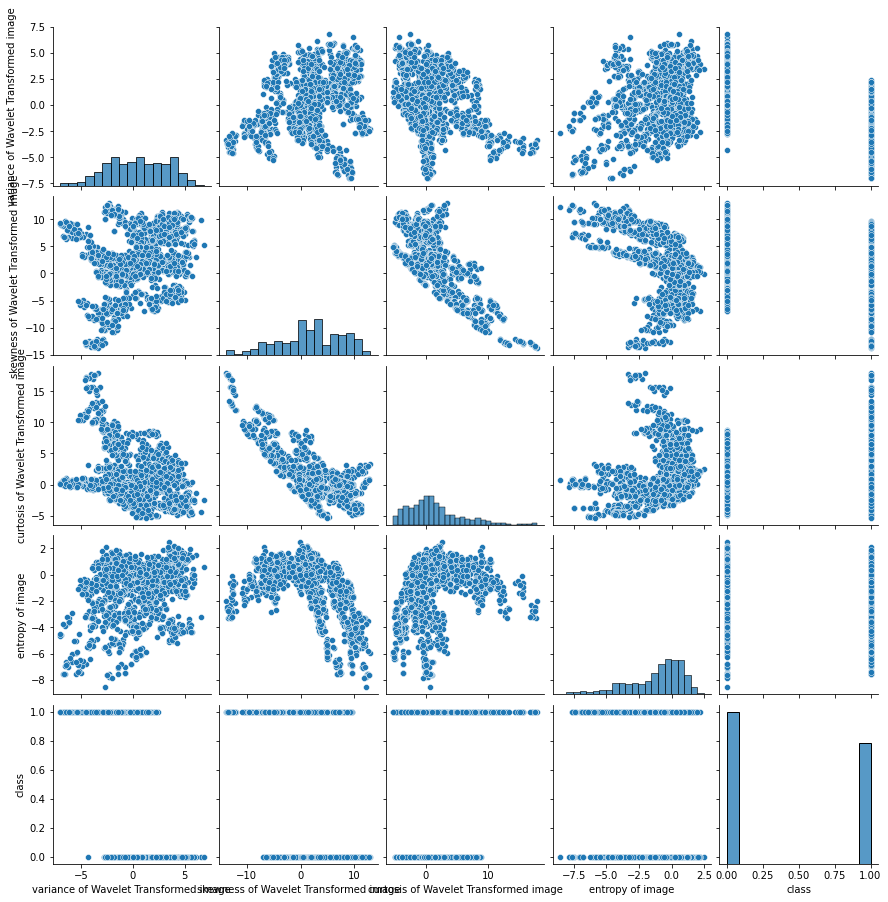

In [16]:
sns.pairplot(df)

<AxesSubplot:>

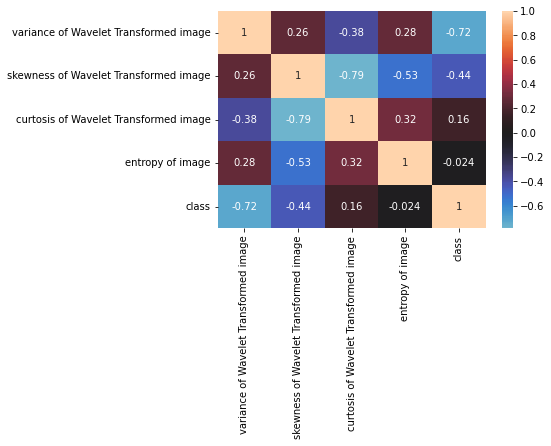

In [17]:
sns.heatmap(df.corr(),annot=True,center=0)

**we have good linear relation between features and we can use if**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
mms=MinMaxScaler()

In [21]:
x=df.drop("class",axis=1).values
y=df["class"].values

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [23]:
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)

# First Model

In [24]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [25]:
model= Sequential()

In [26]:
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [27]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=1500)

Epoch 1/1500
33/33 [==============================] - 1s 7ms/step - loss: 0.6918 - val_loss: 0.6895
Epoch 2/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6876 - val_loss: 0.6855
Epoch 3/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6838 - val_loss: 0.6828
Epoch 4/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6802 - val_loss: 0.6789
Epoch 5/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.6763 - val_loss: 0.6746
Epoch 6/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6734 - val_loss: 0.6711
Epoch 7/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6686 - val_loss: 0.6663
Epoch 8/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6645 - val_loss: 0.6619
Epoch 9/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6600 - val_loss: 0.6570
Epoch 10/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6546 - val_loss: 0.6505

33/33 [==============================] - 0s 2ms/step - loss: 0.1165 - val_loss: 0.1365
Epoch 83/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1147 - val_loss: 0.1328
Epoch 84/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1120 - val_loss: 0.1340
Epoch 85/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.1100 - val_loss: 0.1318
Epoch 86/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1081 - val_loss: 0.1229
Epoch 87/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1074 - val_loss: 0.1252
Epoch 88/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1039 - val_loss: 0.1310
Epoch 89/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1035 - val_loss: 0.1238
Epoch 90/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.1004 - val_loss: 0.1199
Epoch 91/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0991 - val_loss: 0.1222
Epoc

33/33 [==============================] - 0s 2ms/step - loss: 0.0358 - val_loss: 0.0639
Epoch 163/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0524
Epoch 164/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.0639
Epoch 165/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.0533
Epoch 166/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.0632
Epoch 167/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.0478
Epoch 168/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0331 - val_loss: 0.0618
Epoch 169/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0476
Epoch 170/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0520
Epoch 171/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0310
Epoch 243/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0325
Epoch 244/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0284
Epoch 245/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0312
Epoch 246/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0302
Epoch 247/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0281
Epoch 248/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0289
Epoch 249/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0289
Epoch 250/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0287
Epoch 251/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0198
Epoch 323/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0190
Epoch 324/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0176
Epoch 325/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0223
Epoch 326/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0169
Epoch 327/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0244
Epoch 328/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0228
Epoch 329/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0191
Epoch 330/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0247
Epoch 331/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0331
Epoch 403/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0131
Epoch 404/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0106
Epoch 405/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0128
Epoch 406/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0124
Epoch 407/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0078
Epoch 408/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0087
Epoch 409/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0147
Epoch 410/1500
33/33 [==============================] - ETA: 0s - loss: 0.030 - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0110
Epoch 411/1500
33/33 [==============================] - 0s 2ms/step - los

33/33 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0109
Epoch 483/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0101
Epoch 484/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0076
Epoch 485/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 486/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0133
Epoch 487/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0059
Epoch 488/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0083
Epoch 489/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0077
Epoch 490/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0070
Epoch 491/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0051
Epoch 563/1500
33/33 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0067
Epoch 564/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 565/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0063
Epoch 566/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 567/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0050
Epoch 568/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0064
Epoch 569/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 570/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 571/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0100
Epoch 643/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 644/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 645/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 646/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 647/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0065
Epoch 648/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 649/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 650/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 651/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 8.2726e-04 - val_loss: 0.0031
Epoch 722/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.0579e-04 - val_loss: 0.0033
Epoch 723/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.2587e-04 - val_loss: 0.0030
Epoch 724/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0089
Epoch 725/1500
33/33 [==============================] - 0s 2ms/step - loss: 9.5174e-04 - val_loss: 0.0020
Epoch 726/1500
33/33 [==============================] - 0s 2ms/step - loss: 9.6858e-04 - val_loss: 0.0037
Epoch 727/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.1837e-04 - val_loss: 0.0046
Epoch 728/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.0019e-04 - val_loss: 0.0054
Epoch 729/1500
33/33 [==============================] - 0s 2ms/step - loss: 7.8502e-04 - val_loss: 0.0040
Epoch 730/1500
33/33 [==============================] - 0s 2ms/st

33/33 [==============================] - 0s 2ms/step - loss: 5.4634e-04 - val_loss: 0.0043
Epoch 799/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.8470e-04 - val_loss: 0.0038
Epoch 800/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.0858e-04 - val_loss: 0.0018
Epoch 801/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.9808e-04 - val_loss: 0.0045
Epoch 802/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.5329e-04 - val_loss: 0.0049
Epoch 803/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.3291e-04 - val_loss: 0.0020
Epoch 804/1500
33/33 [==============================] - 0s 2ms/step - loss: 6.3894e-04 - val_loss: 0.0032
Epoch 805/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.0966e-04 - val_loss: 0.0048
Epoch 806/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.2806e-04 - val_loss: 0.0019
Epoch 807/1500
33/33 [==============================] - 0s 2m

33/33 [==============================] - 0s 2ms/step - loss: 5.0378e-04 - val_loss: 0.0022
Epoch 876/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.3729e-04 - val_loss: 0.0018
Epoch 877/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.5198e-04 - val_loss: 0.0034
Epoch 878/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.1766e-04 - val_loss: 0.0055
Epoch 879/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.0848e-04 - val_loss: 0.0016
Epoch 880/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.7459e-04 - val_loss: 0.0030
Epoch 881/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.0618e-04 - val_loss: 0.0024
Epoch 882/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.0255e-04 - val_loss: 0.0036
Epoch 883/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.2057e-04 - val_loss: 0.0021
Epoch 884/1500
33/33 [==============================] - 0s 2m

33/33 [==============================] - 0s 2ms/step - loss: 2.6068e-04 - val_loss: 0.0047
Epoch 953/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.1819e-04 - val_loss: 0.0029
Epoch 954/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.1626e-04 - val_loss: 0.0033
Epoch 955/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.1253e-04 - val_loss: 0.0030
Epoch 956/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.1711e-04 - val_loss: 0.0034
Epoch 957/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.3466e-04 - val_loss: 0.0023
Epoch 958/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.0884e-04 - val_loss: 0.0038
Epoch 959/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.2990e-04 - val_loss: 0.0028
Epoch 960/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.1471e-04 - val_loss: 0.0026
Epoch 961/1500
33/33 [==============================] - 0s 2m

33/33 [==============================] - 0s 2ms/step - loss: 1.5253e-04 - val_loss: 0.0025
Epoch 1030/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.5147e-04 - val_loss: 0.0026
Epoch 1031/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.5122e-04 - val_loss: 0.0026
Epoch 1032/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.5036e-04 - val_loss: 0.0024
Epoch 1033/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.5287e-04 - val_loss: 0.0030
Epoch 1034/1500
33/33 [==============================] - 0s 3ms/step - loss: 1.5219e-04 - val_loss: 0.0026
Epoch 1035/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.4891e-04 - val_loss: 0.0025
Epoch 1036/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.5353e-04 - val_loss: 0.0027
Epoch 1037/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.4815e-04 - val_loss: 0.0025
Epoch 1038/1500
33/33 [==============================

33/33 [==============================] - 0s 2ms/step - loss: 1.3103e-04 - val_loss: 0.0026
Epoch 1106/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.3148e-04 - val_loss: 0.0040
Epoch 1107/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.3323e-04 - val_loss: 0.0037
Epoch 1108/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.2363e-04 - val_loss: 0.0024
Epoch 1109/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.2741e-04 - val_loss: 0.0023
Epoch 1110/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.2175e-04 - val_loss: 0.0039
Epoch 1111/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.2611e-04 - val_loss: 0.0017
Epoch 1112/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.3033e-04 - val_loss: 0.0028
Epoch 1113/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.2130e-04 - val_loss: 0.0025
Epoch 1114/1500
33/33 [==============================

33/33 [==============================] - 0s 2ms/step - loss: 1.7524e-04 - val_loss: 0.0043
Epoch 1182/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.2369e-04 - val_loss: 0.0017
Epoch 1183/1500
33/33 [==============================] - 0s 2ms/step - loss: 9.3294e-05 - val_loss: 0.0026
Epoch 1184/1500
33/33 [==============================] - 0s 2ms/step - loss: 9.6917e-05 - val_loss: 0.0063
Epoch 1185/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.8908e-05 - val_loss: 0.0031
Epoch 1186/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.2044e-05 - val_loss: 0.0036
Epoch 1187/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.4675e-05 - val_loss: 0.0037
Epoch 1188/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.5334e-05 - val_loss: 0.0045
Epoch 1189/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.7492e-05 - val_loss: 0.0037
Epoch 1190/1500
33/33 [==============================

33/33 [==============================] - 0s 2ms/step - loss: 5.3109e-05 - val_loss: 0.0017
Epoch 1258/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.8795e-05 - val_loss: 0.0012
Epoch 1259/1500
33/33 [==============================] - 0s 2ms/step - loss: 8.8772e-05 - val_loss: 0.0055
Epoch 1260/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.0022
Epoch 1261/1500
33/33 [==============================] - 0s 2ms/step - loss: 9.4000e-04 - val_loss: 0.0074
Epoch 1262/1500
33/33 [==============================] - 0s 2ms/step - loss: 1.8214e-04 - val_loss: 0.0076
Epoch 1263/1500
33/33 [==============================] - 0s 2ms/step - loss: 6.6658e-05 - val_loss: 0.0043
Epoch 1264/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.2771e-05 - val_loss: 0.0038
Epoch 1265/1500
33/33 [==============================] - 0s 2ms/step - loss: 5.1198e-05 - val_loss: 0.0034
Epoch 1266/1500
33/33 [==============================] - 

33/33 [==============================] - 0s 2ms/step - loss: 4.8142e-05 - val_loss: 0.0032
Epoch 1334/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.9273e-05 - val_loss: 0.0024
Epoch 1335/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.8272e-05 - val_loss: 0.0025
Epoch 1336/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7498e-05 - val_loss: 0.0030
Epoch 1337/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7397e-05 - val_loss: 0.0028
Epoch 1338/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7273e-05 - val_loss: 0.0028
Epoch 1339/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7225e-05 - val_loss: 0.0028
Epoch 1340/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.6905e-05 - val_loss: 0.0030
Epoch 1341/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7213e-05 - val_loss: 0.0028
Epoch 1342/1500
33/33 [==============================

33/33 [==============================] - 0s 2ms/step - loss: 4.1491e-05 - val_loss: 0.0029
Epoch 1410/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.2065e-05 - val_loss: 0.0026
Epoch 1411/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.2049e-05 - val_loss: 0.0031
Epoch 1412/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.3306e-05 - val_loss: 0.0025
Epoch 1413/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.4394e-05 - val_loss: 0.0042
Epoch 1414/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.2855e-05 - val_loss: 0.0027
Epoch 1415/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7179e-05 - val_loss: 0.0046
Epoch 1416/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.7238e-05 - val_loss: 0.0014
Epoch 1417/1500
33/33 [==============================] - 0s 2ms/step - loss: 4.3384e-05 - val_loss: 0.0041
Epoch 1418/1500
33/33 [==============================

33/33 [==============================] - 0s 2ms/step - loss: 3.2512e-05 - val_loss: 0.0028
Epoch 1486/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.3273e-05 - val_loss: 0.0034
Epoch 1487/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.0888e-05 - val_loss: 0.0029
Epoch 1488/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.1275e-05 - val_loss: 0.0028
Epoch 1489/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.2474e-05 - val_loss: 0.0049
Epoch 1490/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.2740e-05 - val_loss: 0.0029
Epoch 1491/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.9493e-05 - val_loss: 0.0036
Epoch 1492/1500
33/33 [==============================] - 0s 2ms/step - loss: 2.9331e-05 - val_loss: 0.0028
Epoch 1493/1500
33/33 [==============================] - 0s 2ms/step - loss: 3.1741e-05 - val_loss: 0.0049
Epoch 1494/1500
33/33 [==============================

In [28]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

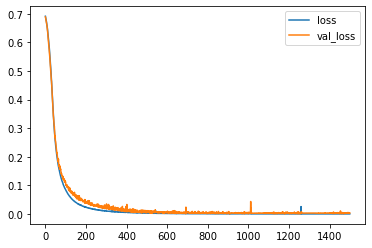

In [29]:
loss.plot()

**Well the model trained well and I think I should try this with more epochs**

In [30]:
prediction1=model.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
from sklearn import metrics

In [32]:
metrics.confusion_matrix(ytest,prediction1)

array([[185,   0],
       [  1, 157]], dtype=int64)

In [33]:
print(metrics.classification_report(prediction1,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       186
           1       0.99      1.00      1.00       157

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



so 99 precent accuracy is very good but in order to get more accurate lets do some math

In [34]:
4/(192+147+4)

0.011661807580174927

**So the accuracy is *98.9* precent**

**Let's try it with more epochs**

In [35]:
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [36]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=2000)

Epoch 1/2000
33/33 [==============================] - 1s 6ms/step - loss: 0.6926 - val_loss: 0.6923
Epoch 2/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6915 - val_loss: 0.6918
Epoch 3/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6906 - val_loss: 0.6914
Epoch 4/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6900 - val_loss: 0.6909
Epoch 5/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6891 - val_loss: 0.6906
Epoch 6/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6886 - val_loss: 0.6905
Epoch 7/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6882 - val_loss: 0.6903
Epoch 8/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6878 - val_loss: 0.6902
Epoch 9/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6875 - val_loss: 0.6901
Epoch 10/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6873 - val_loss: 0.6901

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 82/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 83/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 84/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 85/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 86/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 87/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 88/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 89/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 90/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoc

33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 162/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 163/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 164/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 165/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 166/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 167/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 168/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 169/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 170/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 242/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 243/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 244/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 245/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 246/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 247/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 248/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 249/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 250/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 322/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 323/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 324/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 325/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 326/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 327/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 328/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 329/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 330/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 402/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 403/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 404/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 405/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 406/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 407/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 408/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 409/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 410/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 482/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 483/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 484/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 485/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 486/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 487/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 488/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 489/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 490/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 562/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 563/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 564/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 565/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 566/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 567/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 568/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 569/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 570/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 642/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 643/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 644/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 645/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 646/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 647/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 648/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 649/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 650/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 722/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 723/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6913
Epoch 724/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 725/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 726/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 727/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 728/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 729/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 730/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 802/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 803/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 804/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 805/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 806/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 807/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 808/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 809/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 810/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 882/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 883/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 884/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 885/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 886/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 887/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 888/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 889/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 890/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 962/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 963/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 964/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 965/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 966/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 967/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 968/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 969/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6908
Epoch 970/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1042/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1043/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1044/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1045/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1046/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1047/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1048/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1049/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1050/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 1121/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1122/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1123/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1124/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 1125/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1126/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1127/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 1128/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1129/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1200/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 1201/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1202/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1203/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1204/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1205/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1206/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1207/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1208/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1279/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1280/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1281/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1282/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1283/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1284/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1285/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1286/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1287/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1358/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1359/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1360/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1361/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1362/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1363/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1364/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 1365/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1366/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1437/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1438/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1439/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1440/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 1441/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1442/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1443/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1444/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1445/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6913
Epoch 1516/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6912
Epoch 1517/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1518/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1519/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 1520/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1521/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1522/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1523/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1524/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1595/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1596/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 1597/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1598/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6911
Epoch 1599/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1600/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1601/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1602/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1603/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - val

33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 1674/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1675/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1676/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6908
Epoch 1677/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6909
Epoch 1678/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6908
Epoch 1679/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1680/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1681/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val_loss: 0.6910
Epoch 1682/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6857 - val

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1753/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1754/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1755/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1756/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1757/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1758/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1759/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1760/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1761/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1832/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1833/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1834/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1835/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1836/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1837/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1838/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1839/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1840/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1911/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1912/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1913/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1914/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1915/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1916/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1917/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1918/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1919/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val

33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1990/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1991/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1992/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6909
Epoch 1993/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6910
Epoch 1994/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1995/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1996/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6911
Epoch 1997/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val_loss: 0.6912
Epoch 1998/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6856 - val

In [37]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

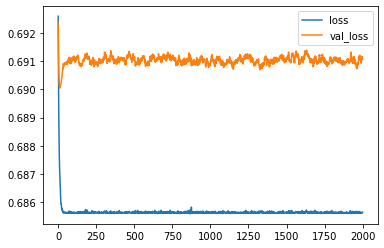

In [38]:
loss.plot()

**I could not get better**

In [39]:
prediction3=model.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
metrics.confusion_matrix(ytest,prediction3)

array([[185,   0],
       [158,   0]], dtype=int64)

**we got 99.2 precent accuracy**

# Second model
though increasing number of epochs is not excelling my modle lets stop it in the best place

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
es=EarlyStopping(patience=25)

In [43]:
model2=Sequential()
model2.add(Dense(4,activation="relu"))
model2.add(Dense(3,activation="relu"))
model2.add(Dense(2,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.compile(loss="binary_crossentropy",optimizer="adam")

In [44]:
model2.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=2000,callbacks=[es])

Epoch 1/2000
33/33 [==============================] - 1s 6ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 2/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6895 - val_loss: 0.6905
Epoch 3/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6859 - val_loss: 0.6862
Epoch 4/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6810 - val_loss: 0.6823
Epoch 5/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6759 - val_loss: 0.6770
Epoch 6/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6700 - val_loss: 0.6715
Epoch 7/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6625 - val_loss: 0.6660
Epoch 8/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6544 - val_loss: 0.6568
Epoch 9/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6448 - val_loss: 0.6495
Epoch 10/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6335 - val_loss: 0.6401

33/33 [==============================] - 0s 2ms/step - loss: 0.1106 - val_loss: 0.1306
Epoch 83/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.1093 - val_loss: 0.1368
Epoch 84/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.1071 - val_loss: 0.1332
Epoch 85/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.1052 - val_loss: 0.1237
Epoch 86/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.1042 - val_loss: 0.1315
Epoch 87/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.1020 - val_loss: 0.1245
Epoch 88/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.1011 - val_loss: 0.1266
Epoch 89/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0990 - val_loss: 0.1279
Epoch 90/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0978 - val_loss: 0.1235
Epoch 91/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0967 - val_loss: 0.1170
Epoc

33/33 [==============================] - 0s 2ms/step - loss: 0.0482 - val_loss: 0.0647
Epoch 163/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0478 - val_loss: 0.0635
Epoch 164/2000
33/33 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.0719
Epoch 165/2000
33/33 [==============================] - 0s 4ms/step - loss: 0.0483 - val_loss: 0.0713
Epoch 166/2000
33/33 [==============================] - 0s 4ms/step - loss: 0.0469 - val_loss: 0.0596
Epoch 167/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0752
Epoch 168/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.0933
Epoch 169/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.0716
Epoch 170/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0462 - val_loss: 0.0762
Epoch 171/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.

In [45]:
loss=pd.DataFrame(model2.history.history)

<AxesSubplot:>

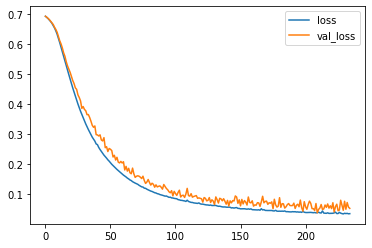

In [46]:
loss.plot()

In [47]:
prediction4=model2.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
metrics.confusion_matrix(ytest,prediction4)

array([[185,   0],
       [  6, 152]], dtype=int64)

In [49]:
print(metrics.classification_report(prediction4,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       191
           1       0.96      1.00      0.98       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



**this is the best result and we only mispredicted 2 points leading us to 99.5 precent accuracy**

In [50]:
2/(194+149)

0.0058309037900874635

**It is not logical to add dropouts because the nodes of my models are not that much but just in case...**

# Third model

In [51]:
from tensorflow.keras.layers import Dropout

In [52]:
model3=Sequential()
model3.add(Dense(4,activation="relu"))
model3.add(Dense(3,activation="relu"))
model3.add(Dense(2,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.compile(loss="binary_crossentropy",optimizer="adam")

In [53]:
model3.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=2000,callbacks=[es])

Epoch 1/2000
33/33 [==============================] - 1s 8ms/step - loss: 0.6927 - val_loss: 0.6925
Epoch 2/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6917 - val_loss: 0.6919
Epoch 3/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6909 - val_loss: 0.6915
Epoch 4/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6902 - val_loss: 0.6911
Epoch 5/2000
33/33 [==============================] - 0s 3ms/step - loss: 0.6895 - val_loss: 0.6908
Epoch 6/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6890 - val_loss: 0.6907
Epoch 7/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6886 - val_loss: 0.6905
Epoch 8/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6883 - val_loss: 0.6904
Epoch 9/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.6880 - val_loss: 0.6903
Epoch 10/2000
33/33 [==============================] - ETA: 0s - loss: 0.686 - 0s 3ms/step - loss: 0

In [54]:
loss=pd.DataFrame(model3.history.history)

<AxesSubplot:>

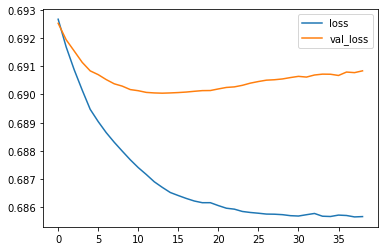

In [55]:
loss.plot()

In [56]:
prediction5=model3.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [57]:
metrics.confusion_matrix(ytest,prediction5)

array([[185,   0],
       [158,   0]], dtype=int64)

In [58]:
5/(5+155+183)

0.014577259475218658

**This model acted better than I thought wit a 98.6 precent accuracy**

# Forth model
*lets add epoch to the best model to see whether it would get better*

In [59]:
model4=Sequential()
model4.add(Dense(4,activation="relu"))
model4.add(Dropout(.5))
model4.add(Dense(3,activation="relu"))
model4.add(Dropout(.5))
model4.add(Dense(2,activation="relu"))
model4.add(Dropout(.5))
model4.add(Dense(1,activation="sigmoid"))
model4.compile(loss="binary_crossentropy",optimizer="adam")

In [60]:
model4.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=2000,callbacks=[es],batch_size=512)

Epoch 1/2000
3/3 [==============================] - 1s 78ms/step - loss: 0.7568 - val_loss: 0.7088
Epoch 2/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.7457 - val_loss: 0.7075
Epoch 3/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.7329 - val_loss: 0.7064
Epoch 4/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.7544 - val_loss: 0.7054
Epoch 5/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.7592 - val_loss: 0.7044
Epoch 6/2000
3/3 [==============================] - 0s 20ms/step - loss: 0.7512 - val_loss: 0.7034
Epoch 7/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.7320 - val_loss: 0.7025
Epoch 8/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.7443 - val_loss: 0.7017
Epoch 9/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.7306 - val_loss: 0.7008
Epoch 10/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.7366 - val_loss: 0.6998
Epoch 11/

In [61]:
loss=pd.DataFrame(model4.history.history)

<AxesSubplot:>

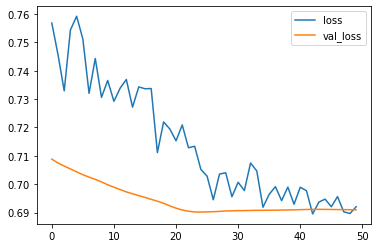

In [62]:
loss.plot()

In [63]:
prediction6=model4.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [64]:
metrics.confusion_matrix(ytest,prediction6)

array([[185,   0],
       [158,   0]], dtype=int64)

In [65]:
print(metrics.classification_report(prediction6,ytest))

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70       343
         1.0       0.00      0.00      0.00         0

    accuracy                           0.54       343
   macro avg       0.50      0.27      0.35       343
weighted avg       1.00      0.54      0.70       343



C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It did not w